<a href="https://colab.research.google.com/github/nelmalfernando/Nelmal_INSE_6220_Project/blob/main/INSE_6220_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import mode, iqr, t, probplot, ttest_1samp
import statistics
from scipy.stats import binom, poisson, norm
import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns; sns.set()
import pandas as pd
import re

In [ ]:
list = '[4 17 7 14 18 12 3 16 10 4 10]'
X = np.array(re.split("\s+", list.replace('[','').replace(']','')), dtype=float)
X.sort()
print('Length: ', len(X))
print(X)

Length:  11
[ 3.  4.  4.  7. 10. 10. 12. 14. 16. 17. 18.]


In [ ]:
X = ([4,17,7,14,18,12,3,16,10,4,10])

In [ ]:
def StemLeafPlot(d):
    #A stem-and-leaf plot
    l,t=np.sort(d),10
    O=range(l[0]-l[0]%t,l[-1]+11,t)
    I=np.searchsorted(l,O)
    for e,a,f in zip(I,I[1:],O): print('%3d|'%(f/t),*(l[e:a]-f),sep='')
    
StemLeafPlot(X) 

TypeError: ignored

In [ ]:
R = np.ptp(X)  #sample range: ptp (peak to peak)
Xbar = np.mean(X) #sample mean
Q2 = np.median(X) #sample median
print('R={0:.2f}, Xbar={1:.2f}, Q2={2:.2f}'.format(R, Xbar, Q2))
M = mode(X) #sample mode
print("The mode is {} with a count of {}".format(M.mode[0], M.count[0]))


R=15.00, Xbar=10.45, Q2=10.00
The mode is 4 with a count of 2


In [ ]:
Q1 = np.percentile(X, 25)
Q3 = np.percentile(X, 75)
IQR = iqr(X) #interquantile_range = Q3-Q1
print('Q1 = {0:.2f}, Q3 = {1:.2f}, IQR = {2:.2f}'.format(Q1, Q3, IQR))

Q1 = 9.53, Q3 = 10.95, IQR = 1.42


In [ ]:
#Variance and standard deviation
var = np.var(X, ddof=1) #sample variance
s = np.std(X, ddof=1) #sample standard deviation
print('var = {0:.2f}, s = {1:.2f}'.format(var, s))

var = 1.00, s = 1.00


((array([-1.90380091, -1.48287381, -1.22601535, -1.03156092, -0.8698858 ,
         -0.7282709 , -0.59996024, -0.48085763, -0.36822879, -0.26009875,
         -0.154935  , -0.05146182,  0.05146182,  0.154935  ,  0.26009875,
          0.36822879,  0.48085763,  0.59996024,  0.7282709 ,  0.8698858 ,
          1.03156092,  1.22601535,  1.48287381,  1.90380091]),
  array([ 4, 11, 14, 23, 23, 23, 23, 24, 27, 29, 31, 33, 40, 42, 44, 44, 44,
         46, 47, 60, 61, 62, 65, 77])),
 (19.16451127433585, 37.375, 0.985805249733491))

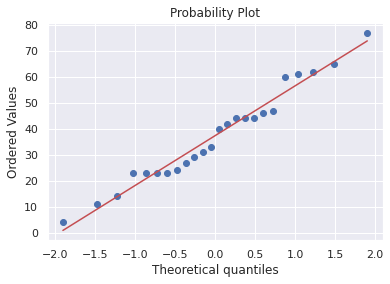

In [ ]:
probplot(X, plot=plt)

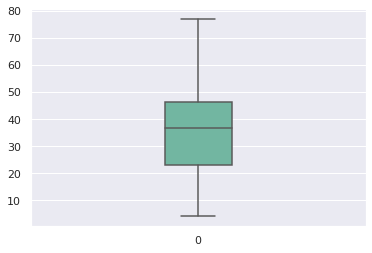

In [ ]:
sns.boxplot(data=X, orient="v", width=.2, palette="Set2")

In [ ]:
pip install control





SyntaxError: ignored